In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## Outline

1. Four Fundamental Subspaces<br>
2. Skeleton decomposition
3. Low-rank Approximation
4. SVD and its Applications<br>
    4.1 Geometric interpretation <br>
    4.2 Image Reconstruction <br>

## Four Fundamental Subspaces

Let
$$A = \begin{bmatrix} 1 & -1 \\ 2 & 1 \\ -1 & 3 \end{bmatrix}$$

1. Find the column space $\text{col}(A)$ and null space $\text{null}(A)$ of $A$.
2. Determine if $\vec{b} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \in \text{col}(A)$.
3. Determine if $\vec{u} = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \in \text{null}(A)$.

In [2]:
def swap(matrix, row1, row2):
    """Swap two rows in a matrix."""
    matrix[[row1, row2]] = matrix[[row2, row1]]
    return matrix

def scale(matrix, row, scalar):
    """Multiply all entries in a specified row by a scalar."""
    matrix[row] *= scalar
    return matrix

def replace(matrix, row1, row2, scalar):
    """Replace a row by itself plus a scalar multiple of another row."""
    matrix[row1] += scalar * matrix[row2]
    return matrix

In [3]:
M = np.array([[1, -1, 0], [2, 1, 0], [-1, 3, 0]], dtype=float)

In [4]:
M1 = replace(M.copy(), 1, 0, -2)
M2 = replace(M1, 2, 0, 1)
M3 = scale(M2, 1, 1/3)
M4 = replace(M3, 2, 1, -2)

print("Reduced Matrix M4:")
print(M4)

Reduced Matrix M4:
[[ 1. -1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]


In [5]:
M_augm = np.array([[1, -1, 1], [2, 1, 2], [-1, 3, 1]], dtype=float)
M

array([[ 1., -1.,  0.],
       [ 2.,  1.,  0.],
       [-1.,  3.,  0.]])

In [6]:
# Row Reduction Example
M1 = replace(M_augm.copy(), 1, 0, -2)
M2 = replace(M1, 2, 0, 1)
M3 = scale(M2, 1, 1/3)
M4 = replace(M3, 2, 1, -2)
M4

array([[ 1., -1.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  2.]])

$$A = \begin{bmatrix} 1 & -1 \\ 2 & 1 \\ -1 & 3 \end{bmatrix} \sim
\begin{bmatrix} 1 & -1 \\ 0 & 3 \\ 0 & 2 \end{bmatrix} \sim
\begin{bmatrix} 1 & -1 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} \sim
\begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix} $$

$\mathrm{im}(A) = \mathrm{col}(A) = \mathrm{span}\left\{ \begin{bmatrix} 1 \\ 2 \\ -1 \end{bmatrix}, \begin{bmatrix} -1 \\ 1 \\ 3 \end{bmatrix} \right\}$

$\mathrm{im}(A^T) =  \mathrm{col}(A^T) = \mathrm{span}\left\{ \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \end{bmatrix} \right\}$

$\mathrm{ker}(A) = \mathrm{null}(A) = \{ 0 \}$

$\mathrm{ker}(A^T) = \mathrm{null}(A^T) =  \mathrm{span}\left\{ \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} \right\}$



## Skeleton decomposition

$$A = \sum_{\alpha = 1}^r U_{\alpha} V_{\alpha}^T$$

##Low-rank Approximation

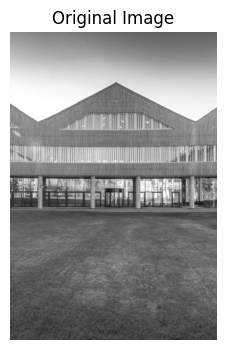

In [7]:
img = Image.open('./sk_campus_img.jpg').convert('L')
img_array = np.array(img)
original_shape = img_array.shape

plt.figure(figsize=(8, 4))
plt.imshow(img_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [8]:
U, S, Vt = np.linalg.svd(img_array, full_matrices=False)  # economy SVD
U.shape, S.shape, Vt.shape

((759, 508), (508,), (508, 508))

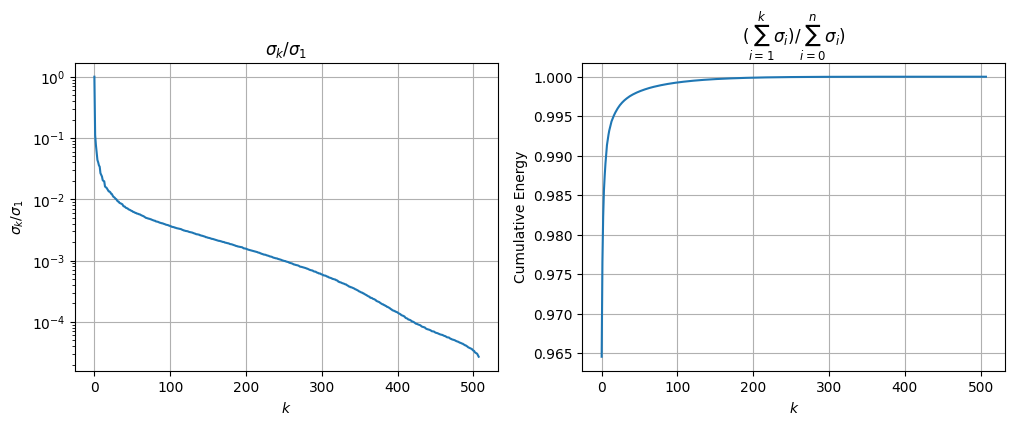

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.semilogy(S / S[0])
plt.xlabel(r"$k$")
plt.ylabel(r"$\sigma_k / \sigma_1$")
plt.title(r"$\sigma_k / \sigma_1$")
plt.grid()


cumulative_energy = np.cumsum(S**2) / np.sum(S**2)
plt.subplot(1, 2, 2)
plt.plot(cumulative_energy)
plt.xlabel(r"$k$")
plt.ylabel(r"Cumulative Energy")
plt.title(r"$(\sum_{i=1}^k \sigma_i) / \sum_{i=0}^n \sigma_i)$")
plt.grid()

plt.show()

In [10]:
def reconstruct_image(k):
    return (U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :])

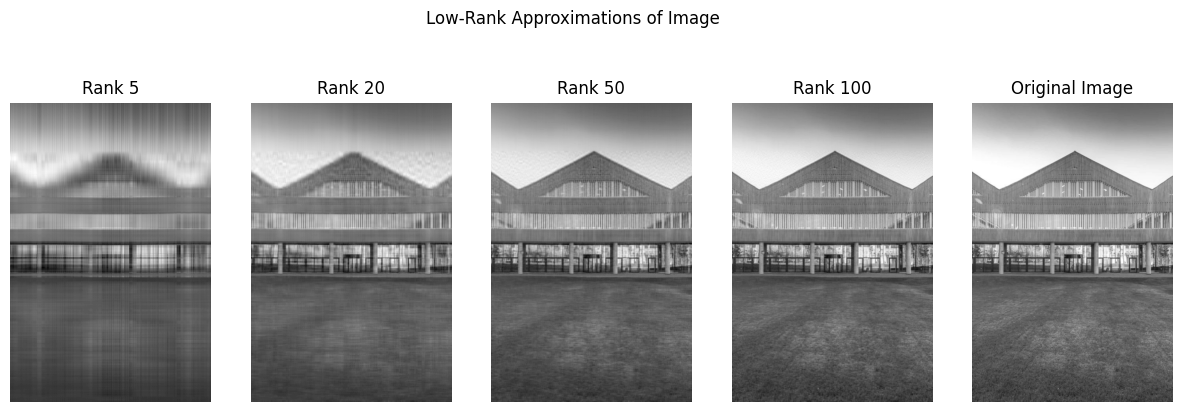

In [11]:
ranks = [5, 20, 50, 100, original_shape[1]]
plt.figure(figsize=(15, 5))

for i, rank in enumerate(ranks, 1):
    plt.subplot(1, len(ranks), i)
    recon_img = reconstruct_image(rank)
    plt.imshow(recon_img, cmap='gray')
    plt.title(f'Rank {rank}') if rank!= original_shape[1] else plt.title(f'Original Image')
    plt.axis('off')

plt.suptitle("Low-Rank Approximations of Image")
plt.show()

## SVD and its Applications

Singular Value Decomposition (SVD) is a versatile tool in numerical linear algebra, implemented in many programming languages, typically relying on the LAPACK (Linear Algebra Package) library written in Fortran for its underlying computations.

### Geometric interpretation



In [12]:
def plot_transformed_circle_and_vectors(A, plot_singular_vectors=False, singular_values=None, singular_vectors=None,
                                        circle_color='black', vector_colors=['blue', 'deeppink'],
                                        singular_vector_colors=['red', 'green'],
                                        singular_labels=[r'$\sigma_1 u_1$', r'$\sigma_2 u_2$'],
                                        label_offset=0.2, xlim=(-8, 8), ylim=(-8, 8)):
    theta = np.linspace(0, 2 * np.pi, 300)
    unit_circle = np.vstack((np.cos(theta), np.sin(theta)))

    transformed_circle = A @ unit_circle

    plt.plot(transformed_circle[0, :], transformed_circle[1, :], color=circle_color, alpha=0.5)

    e1_transformed = A @ np.array([1, 0])
    e2_transformed = A @ np.array([0, 1])

    for i, vec in enumerate([e1_transformed, e2_transformed]):
        color = vector_colors[i]
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=color)

    if plot_singular_vectors and singular_values is not None and singular_vectors is not None:
        for i, (sigma, vec) in enumerate(zip(singular_values, singular_vectors.T)):
            vec_scaled = sigma * vec
            color = singular_vector_colors[i]
            label = singular_labels[i]
            plt.quiver(0, 0, vec_scaled[0], vec_scaled[1], angles='xy', scale_units='xy', scale=1, color=color)
            plt.text(vec_scaled[0] * (1 + label_offset), vec_scaled[1] * (1 + label_offset), label, color=color, fontsize=12)

    plt.axvline(x=0, color='black', lw=1)
    plt.axhline(y=0, color='black', lw=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(xlim)
    plt.ylim(ylim)

Unit circle (before transformation):


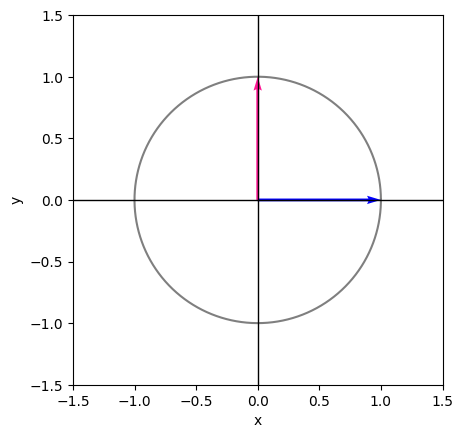

1st rotation by V (right singular vectors):


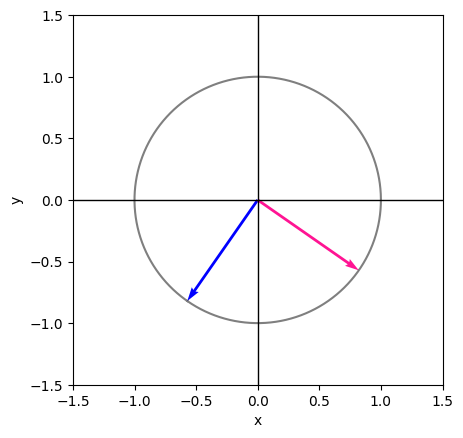

Scaling by D:


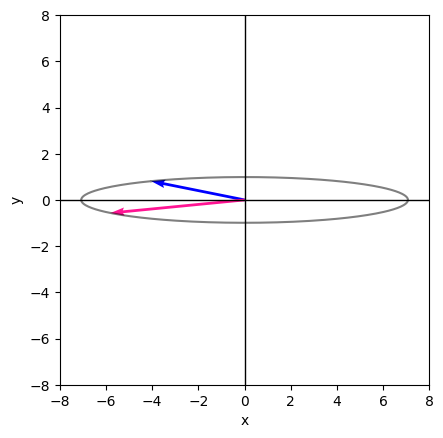

2nd rotation by U (final transformation by A):


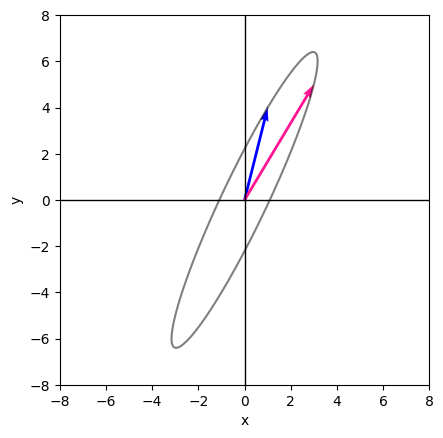

In [13]:
A = np.array([[1, 3], [4, 5]])

U, D, Vt = np.linalg.svd(A)

print('Unit circle (before transformation):')
plot_transformed_circle_and_vectors(np.eye(2), xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
plt.show()

print('1st rotation by V (right singular vectors):')
plot_transformed_circle_and_vectors(Vt.T, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
plt.show()

print('Scaling by D:')
scaling_matrix = np.diag(D) @ Vt
plot_transformed_circle_and_vectors(scaling_matrix, xlim=(-8, 8), ylim=(-8, 8))
plt.show()

print('2nd rotation by U (final transformation by A):')
final_transformation = U @ np.diag(D) @ Vt
plot_transformed_circle_and_vectors(final_transformation, xlim=(-8, 8), ylim=(-8, 8))
plt.show()


Transformed unit circle, basis vectors, and singular vectors:


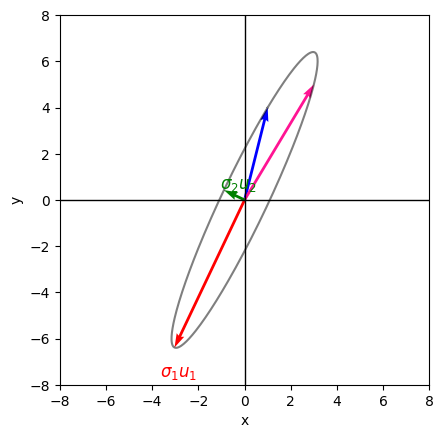

In [14]:
A = np.array([[1, 3], [4, 5]])

U, D, Vt = np.linalg.svd(A)

print("Transformed unit circle, basis vectors, and singular vectors:")
plot_transformed_circle_and_vectors(A,
                                    plot_singular_vectors=True,
                                    singular_values=D,
                                    singular_vectors=U,
                                    singular_labels=[r'$\sigma_1 u_1$', r'$\sigma_2 u_2$'])
plt.show()


## Applications in Image Reconstruction

Matrix completion, commonly used for filling missing data, can be applied to image and recommendation systems. A well-known example is movie recommendation systems, where a ratings matrix is often only partially filled, as users have not rated every movie. To provide accurate recommendations, we aim to predict these missing ratings.

This task is feasible because user ratings tend to follow patterns, meaning the ratings matrix is often low-rank; only a limited amount of information is needed to approximate it well.

A similar approach applies to images, where pixel values often depend on neighboring pixels, making low-rank approximations effective for reconstructing images with missing or corrupted data.


## SVD in Facial Recognition: Eigenfaces

The "Eigenfaces for Recognition" paper introduced a novel approach to facial recognition. Unlike earlier methods that focused on detecting individual features (e.g., eyes or nose), Eigenfaces uses SVD to extract and encode essential information from face images. This encoding allows for efficient comparisons between faces by compressing the most relevant facial information into a low-dimensional representation. This method paved the way for data-driven approaches in face recognition, relying on similarities within the encoded space rather than feature-by-feature comparison.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from sklearn.datasets import fetch_lfw_people

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from sklearn.datasets import fetch_lfw_people

In [17]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
X, y, target_names = lfw_dataset.data, lfw_dataset.target, lfw_dataset.target_names
h, w = lfw_dataset.images.shape[1:3]
print(f"Number of samples: {X.shape[0]}, Image size: {h}x{w}, Unique classes: {len(target_names)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Number of samples: 1140, Image size: 62x47, Unique classes: 5


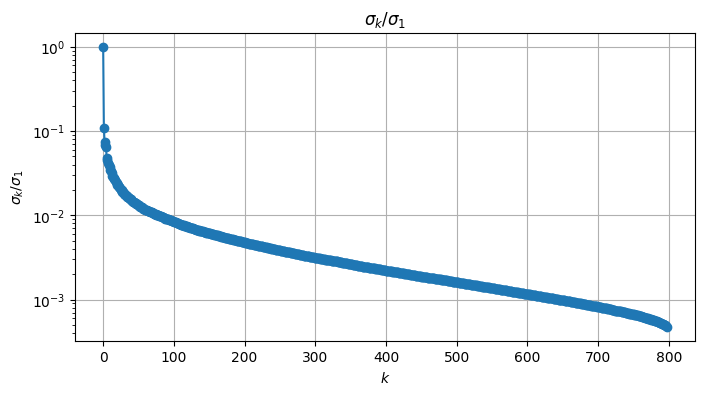

In [18]:
U, S, VT = np.linalg.svd(X_train, full_matrices=False)

num_components = 100
face_space = VT[:num_components, :]

X_train_transformed = X_train @ face_space.T
X_test_transformed = X_test @ face_space.T

plt.figure(figsize=(8, 4))
plt.semilogy(np.arange(len(S)), S / S[0], marker="o")
plt.title("$\sigma_k / \sigma_1$")
plt.xlabel("$k$")
plt.ylabel("$\sigma_k / \sigma_1$")
plt.grid()
plt.show()

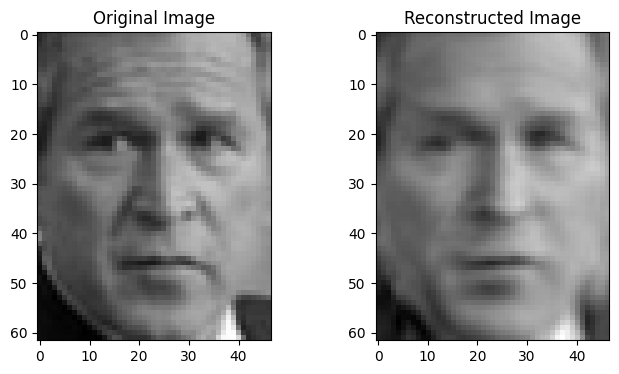

k-NN Classifier Report:
                    precision    recall  f1-score   support

     Colin Powell       0.52      0.70      0.60        71
  Donald Rumsfeld       0.50      0.39      0.44        36
    George W Bush       0.67      0.77      0.71       159
Gerhard Schroeder       0.50      0.18      0.27        33
       Tony Blair       0.52      0.28      0.36        43

         accuracy                           0.60       342
        macro avg       0.54      0.46      0.48       342
     weighted avg       0.58      0.60      0.57       342

MLP Classifier Report:
                    precision    recall  f1-score   support

     Colin Powell       0.84      0.80      0.82        71
  Donald Rumsfeld       0.69      0.69      0.69        36
    George W Bush       0.88      0.92      0.90       159
Gerhard Schroeder       0.81      0.67      0.73        33
       Tony Blair       0.74      0.74      0.74        43

         accuracy                           0.83       342
  

In [19]:
def plot_reconstructed_images(original, transformed, face_space, h, w, index=0):
    reconstructed = transformed[index] @ face_space
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(original[index].reshape(h, w), cmap="gray")
    ax[0].set_title("Original Image")
    ax[1].imshow(reconstructed.reshape(h, w), cmap="gray")
    ax[1].set_title("Reconstructed Image")
    plt.show()

plot_reconstructed_images(X_train, X_train_transformed, face_space, h, w, index=0)

clf_knn = KNeighborsClassifier().fit(X_train_transformed, y_train)
clf_mlp = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, early_stopping=True).fit(X_train_transformed, y_train)

y_pred_knn = clf_knn.predict(X_test_transformed)
y_pred_mlp = clf_mlp.predict(X_test_transformed)
print("k-NN Classifier Report:\n", classification_report(y_test, y_pred_knn, target_names=target_names))
print("MLP Classifier Report:\n", classification_report(y_test, y_pred_mlp, target_names=target_names))

It might seem discouraging, but it's worthwhile to check if the data is imbalanced and go through the steps again (exercise).